In [2]:
# PACKAGES and TABLES
#collection_table ="0_coll_direct_extraction.pkl"
direc = '/Users/yerik/_apple_source/PY/JUPY/py2ms/ms_MUSIC_COLLECTION/'


In [3]:
exec(open(f"ms_2_music_files_export_table.py",encoding="utf-8").read())

------------------------------------------------------------------------- for On DEMAND = Music_2022
###################################################################################################### - HI
######################################################################################################
----------------------------------------------------------------------------------------------------->
- PY ---------------------------------------------------------------------------- GLOBAL/_1_paths.py >
- MOST COMMON :: <desk_path>:<docs_path>:<down_path>::----------------------------------------------->
----------------------------------------------------------------------------------------------------->
********************************************  > No Extension *
									 -*- [ .DS_Store ]

********************************************  > Directory *
									 -*- [ .ipynb_checkpoints ]

********************************************  > .pkl *
									 -*- [ 0_coll-Copy1.pk

ATTN ::: <E>  AFTER making sure that you have assigned the DIRECTORY PATH to ::: var ::: my_folder_path
***df*** will be returned having ::: 462  rows, write df in next cell to see your DATA FRAME

second part FREQUENCIES OF df :::

Grand Total Size in MB: 12924.831
Grand Total Size in Bytes: 13552667797.000
Grand Total Size in GB: 12.622

 FREQUENCY TABLE::: 

     Extension  frequency  total_size_in_mb
0       .wav        282       8486.860006
1      .aiff        144       4275.668518
2                    20          0.025398
3       .mp3         10        162.202727
4       .jpg          4          0.066734
5  .DS_Store          2          0.007812


 FREQUENCY TABLE of 

 ['.m4a', '.mp3', '.MP3', '.Mp3', '.wav', '.WAV', '.flac', '.FLAC', '.aac', '.ogg', '.wma', '.au', '.aif', '.aiff'] 



total music files :  436 

   Extension  frequency  total_size_in_mb
0      .wav        282       8486.860006
1     .aiff        144       4275.668518
2      .mp3         10        162.202727
 
 A

# OTHER DIRECTORY

In [4]:
## ATTN FOR OTHER DIRECTORIES - just uncomment this *******************

# path_songs = f'/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1_source_DJ' 
# exec(open(f"{direc}/ms_1_music_files.py",encoding="utf-8").read()) #paths
# df_AU_ALL =df_AU.copy()
# df_AU_ALL.head()

In [5]:
# CLEAN
df = df_AU_ALL[~df_AU_ALL['Name'].str.startswith('._')].copy()
df = df[df['Type'] != 'Directory']

len(df)#.head()
df

,Name,Type,Path,Extension,Size (MB)
0,LA MAMA GORDOXR,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.wav,65.412533
1,Boris Brejcha -,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,19.894636
2,Massano - The F,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,19.577145
3,WhoMadeWho - Ev,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,18.569843
4,Claude VonStrok,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,18.524839
...,...,...,...,...,...
7111,"Hanz, Makzo - T",File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,.mp3,4.625304
7112,fr_pieg-14_03_2,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,.mp3,4.618976
7113,01 Intro En sou,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,.mp3,4.618972
7114,[P] Walker & Ro,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_1...,.mp3,4.594223


In [6]:
df = df.head(10).copy()

# MAIN FUNCTIONS

### QUALITATIVE

In [7]:

#1# COMPPUTE ---------------------- DURATION
exec(open(f"_ms_fields_1_duration.py",encoding="utf-8").read())
df['Duration'] = [get_duration(path) for path in tqdm(df['Path'], desc="DURATION:::Processing files")]

#2# COMPPUTE ---------------------- BITRATE
exec(open(f"_ms_fields_2_bitrate.py",encoding="utf-8").read());print('BITRATE :::Processing files : DONE')
df['bitrate'] = df.apply(lambda row: compute_bitrate(row['Path'], row['Duration']), axis=1)



DURATION:::Processing files: 100%|██████████████| 10/10 [00:01<00:00,  7.78it/s]

BITRATE :::Processing files : DONE


### duration check

In [8]:
# Convert 'duration' column to numeric, coercing errors to NaN
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [9]:
# make a new variable
df['duration_minutes'] = df['Duration'] / 60
#filter songs below 2 min long
df_short_erase = df[df['duration_minutes'] < 2].copy()
#filter songs over 12 min long
df_long_erase = df[df['duration_minutes'] > 12].copy()
#filter songs within range (2,12)
df = df[(df['duration_minutes'] > 2) & (df['duration_minutes'] < 12)].copy()


### bitrate check

In [10]:
df = df[df['bitrate'] >= 320].copy()
# erase 
df_bitrate_erase = df[df['bitrate'] < 320].copy()
print('\n\nwill be ERASE from BITRATE ::',len(df_bitrate_erase))



will be ERASE from BITRATE :: 0


In [11]:
# taking 320 bitrate as the lowest quality accepted, we move forward and export the table for futher investigation
# remember the goal of this project is to filter songs for ultimate collection where we can play without so much 
# worrying of what is the quality and DO INVESTIGATE in case you have 319 through DF_FILETERED first
print(df_bitrate_erase['bitrate'].value_counts().sort_index(ascending=True))

print('\n !!! Following will be adding after found duplicates NEXT :: ',len(df))


Series([], Name: bitrate, dtype: int64)

 !!! Following will be adding after found duplicates NEXT ::  10


In [12]:
df.head()

,Name,Type,Path,Extension,Size (MB),Duration,bitrate,duration_minutes
0,LA MAMA GORDOXR,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.wav,65.412533,388.800000,1411.317119,6.480000
1,Boris Brejcha -,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,19.894636,520.359184,320.717514,8.672653
2,Massano - The F,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,19.577145,512.052245,320.719211,8.534204
3,WhoMadeWho - Ev,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,18.569843,485.694694,320.726452,8.094912
4,Claude VonStrok,File,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,.mp3,18.524839,484.519184,320.725414,8.075320


### QUANTITATIVE

In [13]:
################################################                                       1) id TAGS
exec(open(f"{direc}/_ms_pl_info_1a_all-id-tags.py", encoding="utf-8").read())
    ################################################                                       2)  LUFS
exec(open(f"{direc}/_ms_pl_info_2_all_LUFS.py",encoding="utf-8").read())
df['lufs'] = compute_lufs_for_paths(df['Path'])
    ################################################                                       3)  BPM
exec(open(f"{direc}/_ms_pl_info_3_BPM.py",encoding="utf-8").read())
df['BPM'] = [compute_bpm(x) if x.endswith(tuple(audio_extensions)) else None for x in tqdm(df['Path'], desc="Computing BPM")]

Processing WAV Files: 100%|███████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Error at index 0: object of type 'TIT2' has no len()


Processing MP3 Files: 100%|███████████████████████| 9/9 [00:01<00:00,  6.42it/s]


ID tags registered


Computing BPM: 100%|████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]


In [14]:
df.head()

,Name,Type,Extension,Size (MB),bitrate,Duration,duration_minutes,Path,idt_title,idt_artist,idt_album,idt_year,idt_track,idt_genre,idt_comment,idt_audio_offset,lufs,BPM
0,LA MAMA GORDOXR,File,.wav,65.412533,1411.317119,388.800000,6.480000,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.749,126.103521
1,Boris Brejcha -,File,.mp3,19.894636,320.717514,520.359184,8.672653,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,Boris Brejcha - FEAR myfreemp3.vip,NaN,NaN,NaN,NaN,NaN,NaN,45627.0,-10.823,125.950032
2,Massano - The F,File,.mp3,19.577145,320.719211,512.052245,8.534204,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,Massano - The Feeling myfreemp3.vip,NaN,NaN,NaN,NaN,NaN,NaN,44991.0,-12.092,124.852276
3,WhoMadeWho - Ev,File,.mp3,18.569843,320.726452,485.694694,8.094912,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,WhoMadeWho - Every Minute Alone (Tale of Us an...,NaN,NaN,NaN,NaN,NaN,NaN,43061.0,-12.551,126.055011
4,Claude VonStrok,File,.mp3,18.524839,320.725414,484.519184,8.075320,/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_0...,Claude VonStroke - Can't Wait myfreemp3.vip,NaN,NaN,NaN,NaN,NaN,NaN,42891.0,-9.679,123.972508


# INVESTIGATE for DUPLICATES

In [15]:
# Make DF the same for identifier

df['Size (MB) id'] = df['Size (MB)'].astype(str)
df['file_id'] = df['Name']+ '-MB-' +df['Size (MB) id']+ df['Extension']

# CHECK UNIQUE and/repeated
# Rows without duplicated SHA256 values (keeping only the first occurrence)
df_unique = df[~df['file_id'].duplicated(keep='first')].copy()
    
    # Rows with duplicated SHA256 values (excluding the first occurrence)
df_duplicates = df[df['file_id'].duplicated(keep='first')]

print('UNIQUE & DUPLICATES based on New name' )
print('UNIQUE     :::',len(df_unique), '  \nDUPLICATES :::' ,len(df_duplicates))



UNIQUE & DUPLICATES based on New name
UNIQUE     ::: 10   
DUPLICATES ::: 0


# ERASE ( 1) The ones that did not pass quality CHECK (2) DUPLICATES 

### move

In [16]:
import shutil
import pandas as pd

def move_files(df, destination):
    """
    Move files from the 'Path' column of the dataframe to the specified destination.
    """
    for file_path in tqdm(df['Path'], desc="Moving files", unit="file"):
        try:
            shutil.copy(file_path, destination)
        except Exception as e:
            print(f"Error moving {file_path} to {destination}: {e}")


# Move files based on the dataframe's intended destination

# e_1_a # BITRATE erase to UNWANTED SONGS  "Music_misc/UNWANTED_songs"
move_files(df_bitrate_erase, "/Volumes/HD_back_UP/ALL_MUSIC/Music_misc/UNWANTED_songs")

# e_1_b # DURATION erase

# send to possible PRODUCTION MATERIAL "_2_source_PROD/PROD_check"
move_files(df_short_erase, "/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_2_source_PROD/PROD_check")
# send to possible SETS to keep         "_4_SETS/SETS_check"
move_files(df_long_erase, "/Volumes/HD_back_UP/ALL_MUSIC/Music_back_up/_4_SETS/SETS_check")

# e_2 # DUPLICATES
move_files(df_duplicates, "/Volumes/HD_back_UP/ALL_MUSIC/Music_misc/UNWANTED_songs/_DUPLICATES")


Moving files: 0file [00:00, ?file/s]
Moving files: 0file [00:00, ?file/s]
Moving files: 0file [00:00, ?file/s]
Moving files: 0file [00:00, ?file/s]


## erase

In [17]:
df_duplicates

,Name,Type,Extension,Size (MB),bitrate,Duration,duration_minutes,Path,idt_title,idt_artist,idt_album,idt_year,idt_track,idt_genre,idt_comment,idt_audio_offset,lufs,BPM,Size (MB) id,file_id


In [18]:
df_delete = df_duplicates # what data frames to erase

In [19]:

import os
from tqdm import tqdm
import pandas as pd

def delete_files_safely(df):
    """
    Safely delete the files listed in the 'Path' column of the dataframe.
    Bypass and print any errors encountered.
    """
    for file_path in tqdm(df['Path'], desc="Deleting files", unit="file"):
        try:
            os.remove(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e} : OPPENING FILES")

input_delete = input('ATTN:: To delete this files [y]   ')

if input_delete == 'y':
    delete_files_safely(df_delete)

ATTN:: To delete this files [y]   


In [20]:
# # if subprocess fails does not delete show in Finder
# import subprocess

# def open_in_finder(file_paths):
#     """
#     Open the specified file paths in Finder.
#     """
#     for path in file_paths:
#         input('ATTN:: ABOUT TO OPEN locked files in FOLDER ')
#         subprocess.run(['open', '-R', path])
        
# open_in_finder(df_delete['Path'])

In [ ]:
df_unique

# EXPORT

In [21]:
#df_unique.to_pickle(f'another_coll.pkl')

In [22]:
#END


# CHECK COLLECTION - QUALITATIVE

In [23]:
# FILE SIZE , BITRATE and duration_minutes

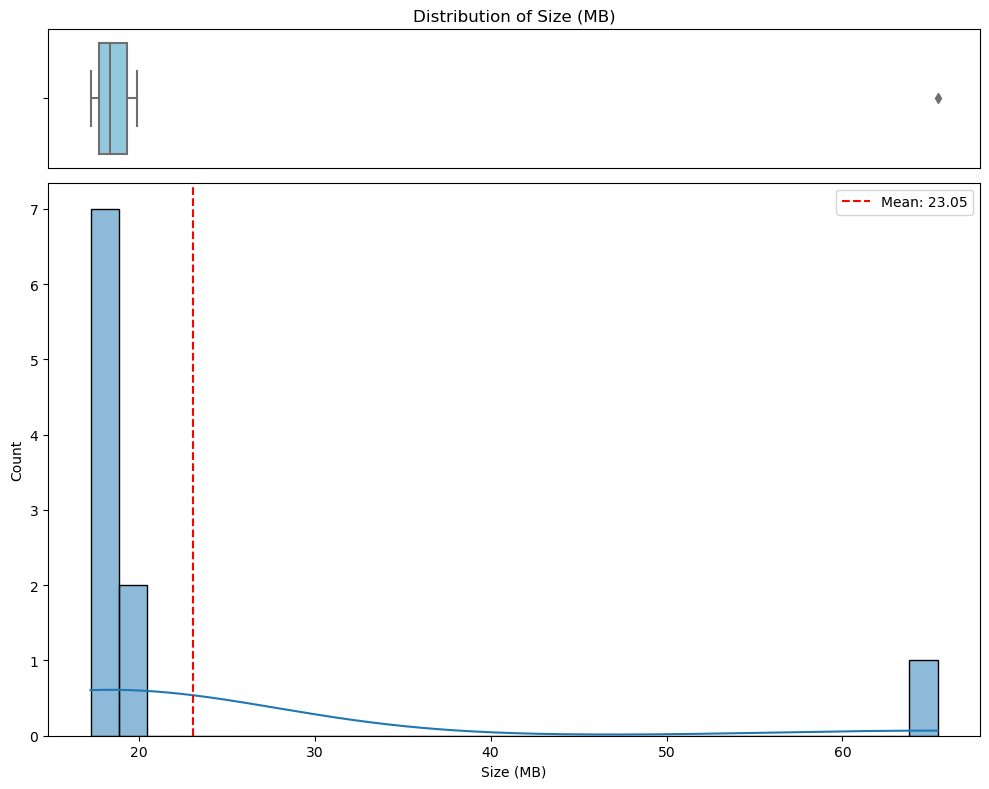

In [24]:
exec(open(f"{direc}/_ms_EDA_1_numeric_var_graph.py",encoding="utf-8").read())
visualize_distribution(df, 'Size (MB)')

In [25]:
# bitrate

In [26]:
# bitrate

sorted_tracks = df.sort_values(by='bitrate', ascending=True)
print(sorted_tracks[['Name', 'bitrate']].head(3))  # top 10 loudest tracks

              Name     bitrate
1  Boris Brejcha -  320.717514
2  Massano - The F  320.719211
4  Claude VonStrok  320.725414


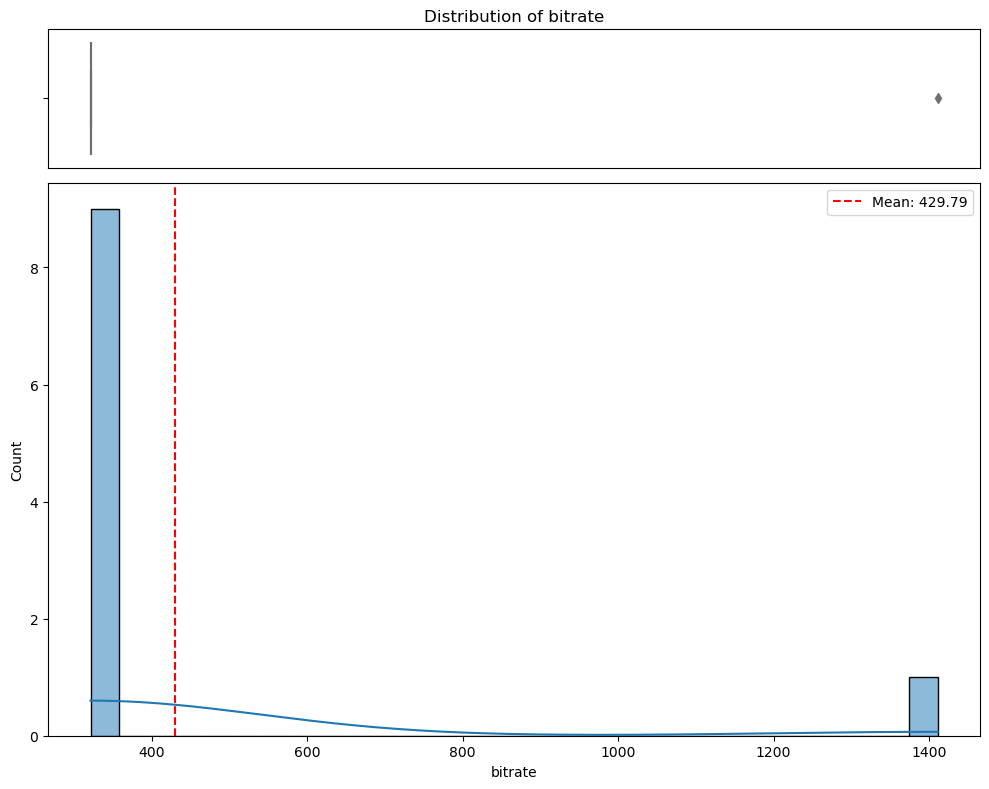

In [27]:
visualize_distribution(df, 'bitrate')

In [28]:
# duration

              Name  duration_minutes
0  LA MAMA GORDOXR          6.480000
9  Eddie Le Funk -          7.518912
8  EVREN FURTUNA -          7.685660


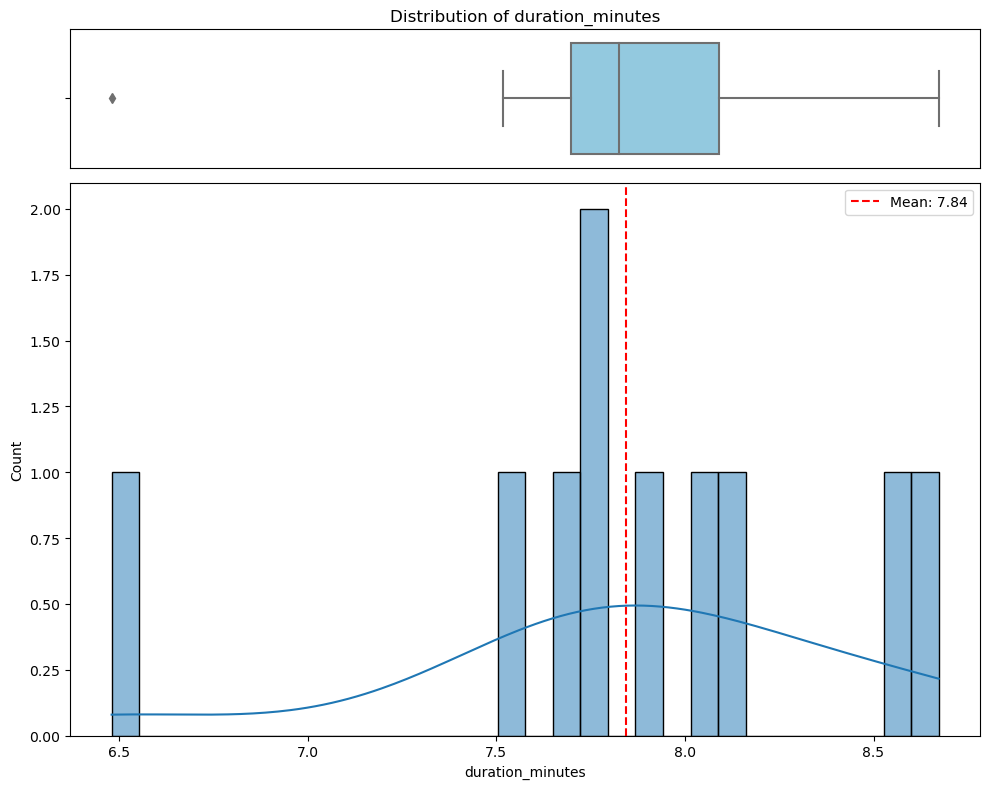

In [29]:
# DURATION
sorted_tracks = df.sort_values(by='duration_minutes', ascending=True)
print(sorted_tracks[['Name', 'duration_minutes']].head(3))  # top 10 loudest tracks

#
visualize_distribution(df, 'duration_minutes')

In [30]:
# (EDA)- exploratory data analysis -  COLLECTION - QUALITATIVE

In [31]:
# lufs

              Name    lufs
0  LA MAMA GORDOXR  -7.749
5  RÜFÜS DU SOL   -7.962
7  Shadow Child -   -8.474
6  ARTBAT - Horizo  -9.514
4  Claude VonStrok  -9.679
8  EVREN FURTUNA -  -9.728
1  Boris Brejcha - -10.823
9  Eddie Le Funk - -11.704
2  Massano - The F -12.092

               Name    lufs
3  WhoMadeWho - Ev -12.551
2  Massano - The F -12.092
9  Eddie Le Funk - -11.704


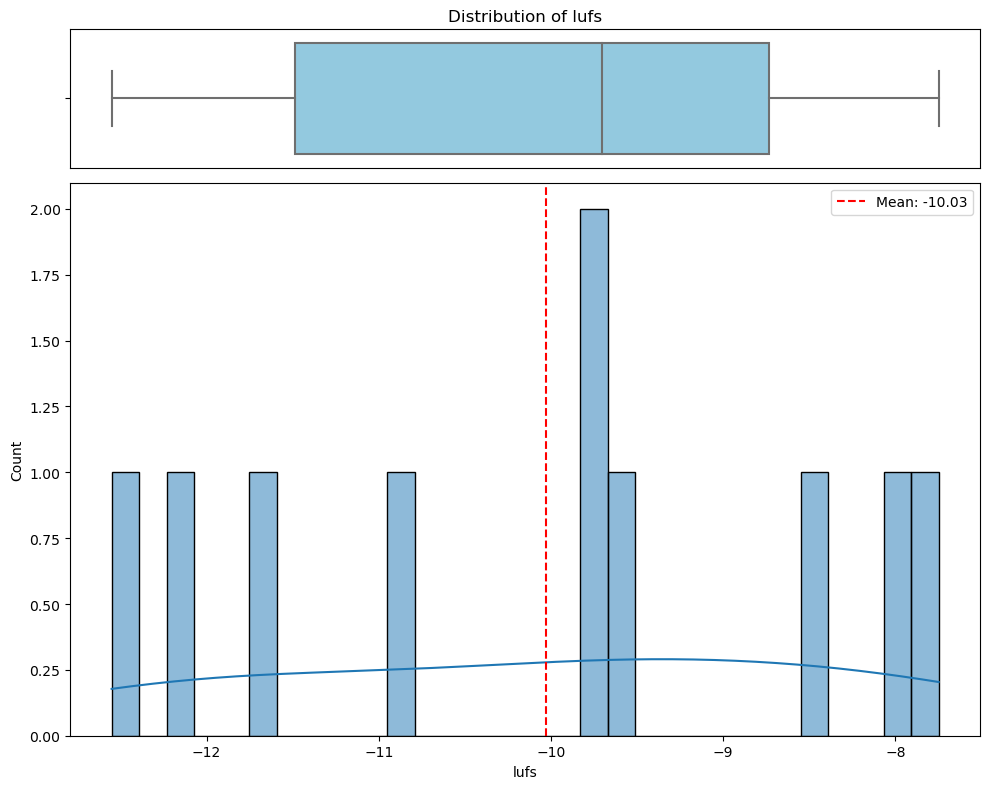

In [32]:
sorted_tracks = df.sort_values(by='lufs', ascending=False)
print(sorted_tracks[['Name', 'lufs']].head(9))  # top 10 loudest tracks


sorted_tracks_a = df.sort_values(by='lufs', ascending=True)
print('\n',sorted_tracks_a[['Name', 'lufs']].head(3))  # top 10 loudest tracks

visualize_distribution(df, 'lufs')

In [33]:
# genre

In [34]:
dis = df['idt_genre'].value_counts()
dis.head(40)

Series([], Name: idt_genre, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

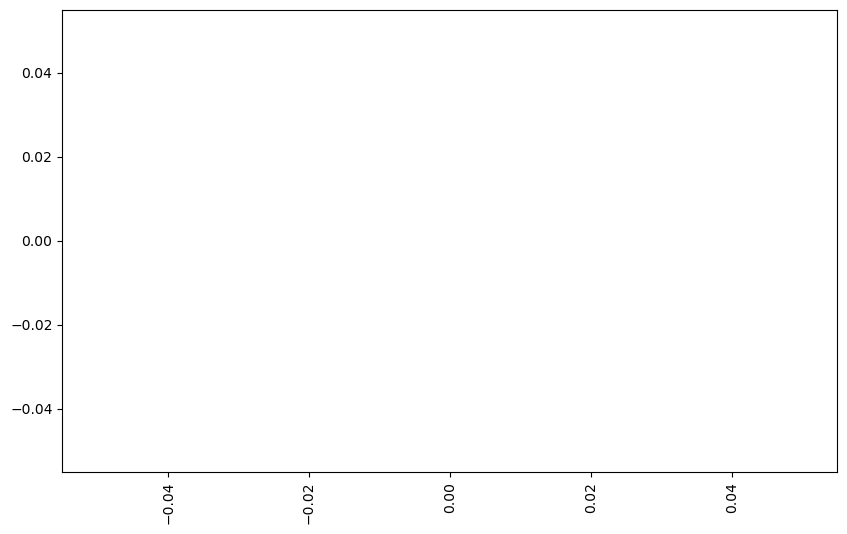

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded your df_all from somewhere

# Compute the counts
idt_genre_counts = dis.head(40)

# Plot the counts
plt.figure(figsize=(10,6))
idt_genre_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of idt_genre')
plt.tight_layout()
plt.show()


In [ ]:
# year

In [ ]:
# END - follow by 